In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_I(V, R_V, R_1):
    return V/(R_V + R_1)
def calc_V_R_V(R_V, I):
    return R_V*I
def calc_V_ef(V_R_V):
    return V_R_V/(2*np.sqrt(2))

def calc_delta_I(V, R_1, R_V, delta_R_V, delta_R_1, delta_V):
    partial_I_partial_R1 = -(V)/((R_V + R_1)**2)
    partial_I_partial_R_V = -(V)/((R_V + R_1)**2)
    partial_I_partial_V = 1/(R_V + R_1)
    
    delta_I = np.sqrt( ((partial_I_partial_R1)**2)*(delta_R_1**2) + 
                      ((partial_I_partial_R_V)**2)*(delta_R_V**2) +
                      ((partial_I_partial_V)**2)*(delta_V**2))
    return delta_I

def calc_delta_V_R_V(R_V, I, delta_R_V, delta_I):
    partial_V_R_V_partial_I = R_V
    partial_V_R_V_partial_R_V = I
    
    delta_V_R_V = np.sqrt( ((partial_V_R_V_partial_I)**2)*(delta_I**2) + 
                      ((partial_V_R_V_partial_R_V)**2)*(delta_R_V**2) )
    return delta_V_R_V
def calc_delta_V_ef(delta_V_R_V):
    partial = 1/(2*np.sqrt(2))
    delta= np.sqrt((partial**2)*(delta_V_R_V**2))
    return delta


In [3]:
V_tot = 6.
delta_V_tot = 0.2
R_1 = 9.9
delta_R_1 = 0.1

R_V = [10.,19.,31.,40.,50.]
delta_R_V = [1,2,3,4,5]

I = [calc_I(V_tot, R_V[i], R_1) for i in range(len(R_V))]
delta_I = [calc_delta_I(V_tot, R_1, R_V[i], delta_R_V[i], delta_R_1, delta_V_tot) for i in range(len(R_V))]

V_R_V = [calc_V_R_V(R_V[j], I[j]) for j in range(len(I))]
delta_V_R_V = [calc_delta_V_R_V(R_V[i], I[i], delta_R_V[i], delta_I[i]) for i in range(len(R_V))]

V_ef = [calc_V_ef(V_R_V[h]) for h in range(len(V_R_V))]
delta_V_ef = [calc_delta_V_ef(delta_V_R_V[i]) for i in range(len(delta_V_R_V))]

In [4]:
10.*0.3

3.0

In [5]:
I

[0.30150753768844224,
 0.20761245674740486,
 0.1466992665036675,
 0.12024048096192386,
 0.1001669449081803]

In [6]:
delta_I

[0.018244449455945472,
 0.015963627904394033,
 0.011824777867243806,
 0.01044141929164358,
 0.009004751387610747]

In [7]:
V_R_V

[3.0150753768844223,
 3.9446366782006925,
 4.547677261613693,
 4.809619238476954,
 5.008347245409015]

In [8]:
delta_V_R_V

[0.3524099727277909,
 0.5142062192504321,
 0.5727636993135204,
 0.6369941531203619,
 0.673460681990905]

In [9]:
V_ef

[1.0659901223917803,
 1.3946396722364434,
 1.6078467151674554,
 1.7004571892261664,
 1.7707181498828402]

In [10]:
delta_V_ef

[0.1245957407367936,
 0.18179935228013858,
 0.2025025479010415,
 0.22521144262379492,
 0.23810430754914294]

In [14]:
T = [5, 3.1, 2.6, 2.0, 1.6, 1.2]
T = [i*0.2e-3 for i in T]
f = [1/i for i in T]


In [22]:
def delta_f(T, deltaT):
    partial = -1/(T**2)
    return np.sqrt((partial**2)*(deltaT**2))

In [20]:
deltaT = 0.04e-3

In [15]:
T

[0.001, 0.00062, 0.0005200000000000001, 0.0004, 0.00032, 0.00024]

In [25]:
f

[1000.0,
 1612.9032258064517,
 1923.0769230769229,
 2500.0,
 3124.9999999999995,
 4166.666666666667]

In [26]:
f = [i/1e3 for i in f]
f

[1.0,
 1.6129032258064517,
 1.923076923076923,
 2.5,
 3.1249999999999996,
 4.166666666666667]

In [23]:
delta_f = [delta_f(i, deltaT) for i in T]
delta_f

[40.0,
 104.0582726326743,
 147.92899408284023,
 250.00000000000003,
 390.62499999999994,
 694.4444444444446]

In [28]:
delta_f = [i/1e3 for i in delta_f]
delta_f

[0.04,
 0.10405827263267431,
 0.14792899408284024,
 0.25000000000000006,
 0.39062499999999994,
 0.6944444444444445]

In [43]:
i = np.linspace(0., 2*np.pi, 200)
def sin(x):
    return np.sin(x)
def sin3(x):
    return np.sin(1.5*x)
sin2x = sin(i)
sin3x = sin3(i)

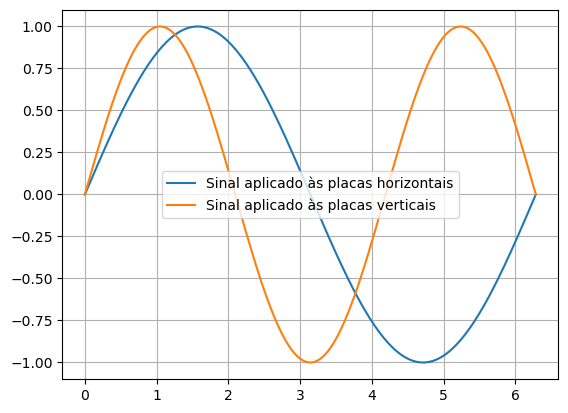

In [50]:
plt.plot(i, sin2x, label = "Sinal aplicado às placas horizontais")
plt.plot(i, sin3x, label = "Sinal aplicado às placas verticais")
plt.grid()
plt.legend()
plt.show()

In [47]:
x = sin3(i)
y = sin(i)

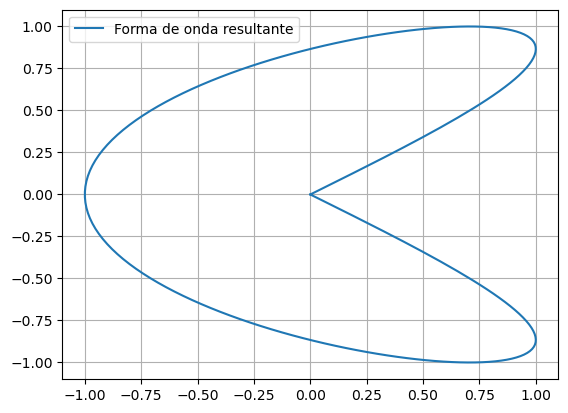

In [52]:
plt.plot(x, y, label = "Forma de onda resultante")
plt.grid()
plt.legend()
plt.show()

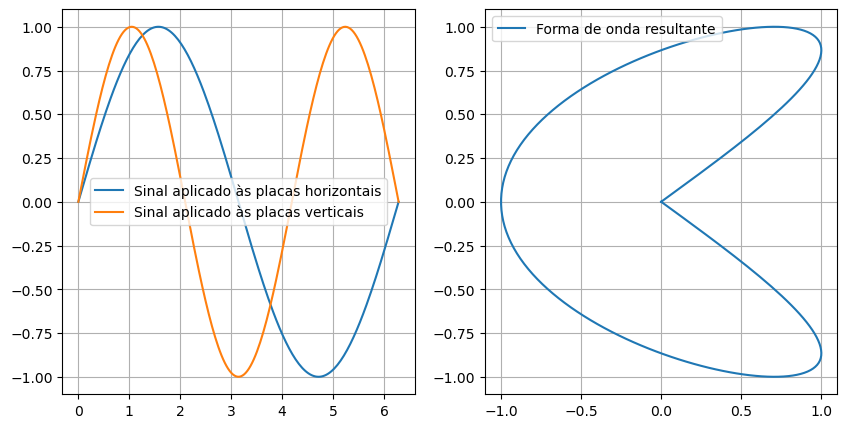

In [57]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(i, sin2x, label = "Sinal aplicado às placas horizontais")
ax[0].plot(i, sin3x, label = "Sinal aplicado às placas verticais")
ax[1].plot(x, y, label = "Forma de onda resultante")
ax[0].grid()
ax[1].grid()
plt.legend()
ax[0].legend()
plt.show()
